작은 이미지 데이터셋에 딥러닝 적용하는 일반적이고 매우 효과적인 방법은 사전 훈련된 네트워크 사용하는 것.
사전 훈련된 네트워크는 일반적으로 대규모 이미지 분류 문제를 위해 대량의 데이터 셋에서 미리 훈련되어 저장된 네트워크 
- 1. 특성추출 
- 2. 미세조정

1. 특성추출 : 사전에 학습된 네트워크의 표현을 사용하여 새로운 샘플에서 흥미로운 특성 뽑아내기

LeNet-5 
- LeNet-5는 복잡하지 않은 망을 이용하여 (당시 기준)높은 성능을 보여주었을 뿐만 아니라 Convolutional layer와 pooling의 조합을 반복하는 현대적인 CNN 구조를 제안했다는 점에서 의미가 있는 모델 
- https://velog.io/@woojinn8/CNN-Network-1.-LeNet


Visual Geometry Group Net(VGGNet)

활성화 함수로 ReLU 사용, Dropout 적용

합성곱과 풀링 계층으로 구성된 블록과 분류를 위한 완전 연결계층으로 결합된 전형적인 구조

인위적으로 데이터셋을 늘림

이미지 변환, 좌우 반전 등의 변환을 시도
몇 개의 합성곱 계층과 최대 풀링 계층이 따르는 5개의 블록과 3개의 완전 연결계층으로 구성

모든 합성곱과 최대 풀링 계층에 padding='SAME' 적용

합성곱 계층에는 stride=1, 활성화 함수로 ReLU 사용

특성맵 깊이를 증가 시킴

척도 변경을 통한 데이터 보강(Data Augmentation)

3x3 커널을 갖는 두 합성곱 계층을 쌓은 스택이 5x5 커널을 갖는 하나의 합성곱 계층과 동일한 수용영역(ERF)을 가짐

11X11 사이즈의 필터 크기를 가지는 AlexNet과 비교하여 더 작은 합성곱 계층을 더 많이 포함해 더 큰 ERF를 얻음

이와 같이 합성곱 계층의 개수가 많아지면 매개변수 개수를 줄이고 비선형성을 증가시킴

VGG-19 아키텍쳐는 VGG-16에 3개의 합성곱 계층을 추가

LeNet-5, AlexNet, VGG-16, ResNet, Inception Network
https://wooono.tistory.com/233


- VGG-19 아키텍쳐

  - VGG-16에 3개의 합성곱 계층을 추가

  <br>   

  <img src="https://neurohive.io/wp-content/uploads/2018/11/vgg16.png">
  <center>VGG-16 아키텍쳐</center>

  <sub>[이미지 출처] https://neurohive.io/en/popular-networks/vgg16/ </sub>


<br>

- (참고) ILSVRC의 주요 분류 metric 중 하나는 `top-5`
  
  - 상위 5개 예측 안에 정확한 클래스가 포함되면 제대로 예측한 것으로 간주

  - 일반적인 `top-k` metric의 특정 케이스


In [ ]:
import tensorflow as tf
#include_top =true 일 경우 맨 첫번째 원본 데이터 크기와 같은 224,224,3 크기를 입력 받아야함 
vgg_net = tf.keras.applications.VGG16(include_top = True,weights ='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
vgg_net.summary()

553476096/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
import tensorflow as tf
vgg_net = tf.keras.applications.VGG19(include_top = True,weights ='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
vgg_net.summary()

574726144/574710816 [==============================] - 3s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

GoogLeNet, Inception 모듈
- VGGNet을 제치고 같은 해 분류 과제에서 1등을 차지
- 인셉션 블록이라는 개념을 도입하여 인셉션 네트워크라고도 불림
- Inception Module은 layer에 1x1 Convolution layer를 추가해 bottleneck layer를 구현함으로써, channel 수를 감소시키며, 연산량을 줄이는 구조입니다.
이것이 inception module의 기본 아이디어이며, Inception Network는 이러한 Inception Module의 집합입니다.


# GoogLeNet, Inception 모듈

- VGGNet을 제치고 같은 해 분류 과제에서 1등을 차지

- 인셉션 블록이라는 개념을 도입하여, **인셉션 네트워크(Inception Network)**라고도 불림


  <img src="https://miro.medium.com/max/2800/0*rbWRzjKvoGt9W3Mf.png">

  <sub>[이미지 출처] https://medium.com/analytics-vidhya/cnns-architectures-lenet-alexnet-vgg-googlenet-resnet-and-more-666091488df5</sub>

  <br>

- 특징 
  
  - CNN 계산 용량을 최적화하는 것을 고려

  - 전형적인 합성곱, 풀링 계층으로 시작하고, 이 정보는 9개의 인셉션 모듈 스택을 통과  
    해당 모듈을 하위 네트워크라고도 함

  - 각 모듈에서 입력 특징 맵은 서로 다른 계층으로 구성된 4개의 병렬 하위 블록에 전달되고, 이를 서로 다시 연결

  - 모든 합성곱과 풀링 계층의 padding옵션은 "SAME"이며 `stride=1`,  
    활성화 함수는 `ReLU` 사용

- 기여

  - 규모가 큰 블록과 병목을 보편화

  - 병목 계층으로 1x1 합성곱 계층 사용

  - 완전 연결 계층 대신 풀링 계층 사용

  - 중간 소실로 경사 소실 문제 해결

  <img src="https://norman3.github.io/papers/images/google_inception/f01.png">

  <sub>[이미지 출처] https://norman3.github.io/papers/docs/google_inception.html</sub>


In [ ]:
inception3_net = tf.keras.applications.InceptionV3(include_top = True,weights ='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
inception3_net.summary()

96124928/96112376 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)           

ResNet - 잔차 네트워크
- ResNet은 마이크로소프트에서 개발한 알고리즘이며 깊은 신경망을 제공합니다.
- 네트워크의 깊이가 깊어질수록 경사가 소실되거나 폭발하는 문제를 해결하고자 함
- 기존의 망과 차이가 있다면, l+2번째 비선형 함수 입력값에 l 번째 비선형 함수 출력값을 더해줄 수 있도록 지름길(shortcut)을 하나 만들어준다
- 병목 합성곱 계층을 추가하거나 크기가 작은 커널을 사용
- 152개의 훈련 가능한 계층을 수직으로 연결하여 구성
- 모든 합성곱과 풀링 계층에서 패딩옵션으로 'SAME', stride=1 사용
- 3x3 합성곱 계층 다음마다 배치 정규화 적용, 1x1 합성곱 계층에는 활성화 함수가 존재하지 않음


<img src="https://miro.medium.com/max/1200/1*6hF97Upuqg_LdsqWY6n_wg.png">

  <sub>[이미지 출처] https://towardsdatascience.com/review-resnet-winner-of-ilsvrc-2015-image-classification-localization-detection-e39402bfa5d8</sub>


In [ ]:
resnet50 = tf.keras.applications.ResNet50(include_top = True,weights ='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
resnet50.summary()

102981632/102967424 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

(참고) ILSVRC의 주요 분류 metrics 중 하나는 top-5
 -  상위 5개 예측 안에 정확한 클래스가 포함되면 제대로 예측한 것으로 간주
 -  일반적인 top-k metric의 특정 케이스 

# [과제] vgg19를 적용하여 강아지 고양이 분류 모델을 구성 후 성능을 시각화하여 평가하세요(사전 학습된 모델 적용하고 데이터 증식하는 방식 사용,미세조정)

In [ ]:
from tensorflow.keras.applications import VGG19
#weights = 모델을 초기화할 가중치 체크포인트, include_top 최상위 완전 연결 분류기 포함 or 불포함, input_shape 는 주입할 이미지 텐서 크기

conv_base = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

## 데이터 증식 사용하지 않는 빠른 특성 추출

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir= '/content/drive/MyDrive/cakd5_colab/M9_딥러닝알고리즘구현/cats_and_dogs_small'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')
#이미지 스케일 조정
datagen =ImageDataGenerator(rescale=1./255)
batch_size=20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # 제너레이터는 루프 안에서 무한하게 데이터를 만들어내므로 모든 이미지를 한 번씩 처리하고 나면 중지합니다
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
#완전 연결 분류기에 주입하기 위해 (samples,8192)크기로 펼침
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [ ]:
# 완전 연결 분류기 정의하고 훈련하기
from tensorflow.keras import models,layers,optimizers
import keras
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
#학습진행방식을 경정하는 옵티마이저, 피드백 신호 정의하는 손실함수
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


100/100 [==============================] - 2s 5ms/step - loss: 0.6152 - acc: 0.6660 - val_loss: 0.4755 - val_acc: 0.8270
Epoch 2/30
100/100 [==============================] - 0s 4ms/step - loss: 0.4589 - acc: 0.8010 - val_loss: 0.3978 - val_acc: 0.8390
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3842 - acc: 0.8360 - val_loss: 0.3672 - val_acc: 0.8430
Epoch 4/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3625 - acc: 0.8420 - val_loss: 0.3514 - val_acc: 0.8400
Epoch 5/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3243 - acc: 0.8655 - val_loss: 0.3195 - val_acc: 0.8730
Epoch 6/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2989 - acc: 0.8780 - val_loss: 0.3069 - val_acc: 0.8720
Epoch 7/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2835 - acc: 0.8880 - val_loss: 0.2979 - val_acc: 0.8760
Epoch 8/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2720 - acc:

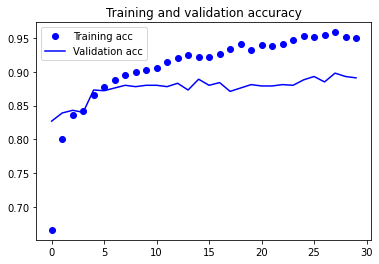

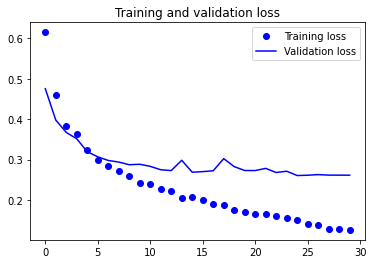

In [ ]:
#결과 그래프 그리기

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


-> 많은 비율로 드롭아웃을 사용했음에도 훈련을 시작하면서 바로 과대적합이 되고 있음
-> -> 작은 이미지 데이터셋에서는 과대적합을 막기 위해 필수적인 데이터 증식을 사용하지 않았기 때문

In [ ]:
# 데이터 증식
# sequential 모델에 conv_base 모델 추가
from keras import models,layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
#다중 레이블 다중 분류 , 이진분류, 0과1사이 값에 대한 회귀
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 22,122,049
Trainable params: 22,122,049
Non-trainable params: 0
_________________________________________________________________


flatten layer는 추출된 주요 특징을 전결합층에 전달하기 위해 1차원 자료로 바꿔주는 layer이다.
이미지 형태의 데이터를 배열형태로 flatten하게 만들어준다.
CNN에서 컨볼루션 레이어나 맥스풀링 레이어를 반복적으로 거치면 주요한 특징만 추출되고 추출된 
주요 특징은 전결합층에 전달되어 학습된다.컨볼루션 레이어나 맥스풀링 레이어는 주로 2차원 자료를 
다루지만 전결합층에 전달하기 위해서는 1차원 자료로 바꿔주는 것이 필요한데 이 때 사용되는 것이 flatten layer이다.

In [ ]:
#trainable = false로 동결할 수 있음 (가중치 업데이트 되지 않도록 막음)-> 사전 학습된 표현이 훈련하는 동안 수정되지 않게 하기 위함
print('conv_base 를 동결하기 전 훈련되는 가중치 수 :',len(model.trainable_weights))

conv_base 를 동결하기 전 훈련되는 가중치 수 : 36


In [ ]:
conv_base.trainable = False
print('conv_base를 동결한 후 훈련되는 가중치 수:',len(model.trainable_weights))

conv_base를 동결한 후 훈련되는 가중치 수: 4


In [ ]:
#동결된 합성곱 기반 층과 함께 모델을 엔드 투 엔드로 훈련하기
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지의 크기를 150 × 150로 변경합니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하므로 이진 레이블이 필요합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

#모델 훈련
# steps_per_epoch: 모델에 하나의 에포크를 정의하기 위해 제너레이터로부터 얼마나 많은 샘플을 뽑을 것인지
# 그 수만큼 경사하강법 진행 후 다음 에포크로 넘어감
# 30개의 샘플이 하나의 배치
# validation data로 제너레이터 전달하면 검증 데이터의 배치를 끝없이 반환
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
100/100 - 23s - loss: 0.5653 - acc: 0.7200 - val_loss: 0.4409 - val_acc: 0.8250 - 23s/epoch - 225ms/step
Epoch 2/30
100/100 - 21s - loss: 0.4476 - acc: 0.8070 - val_loss: 0.3838 - val_acc: 0.8310 - 21s/epoch - 214ms/step
Epoch 3/30
100/100 - 21s - loss: 0.3981 - acc: 0.8220 - val_loss: 0.3386 - val_acc: 0.8530 - 21s/epoch - 214ms/step
Epoch 4/30
100/100 - 22s - loss: 0.3636 - acc: 0.8525 - val_loss: 0.3188 - val_acc: 0.8710 - 22s/epoch - 215ms/step
Epoch 5/30
100/100 - 21s - loss: 0.3475 - acc: 0.8520 - val_loss: 0.3277 - val_acc: 0.8560 - 21s/epoch - 213ms/step
Epoch 6/30
100/100 - 21s - loss: 0.3312 - acc: 0.8645 - val_loss: 0.2927 - val_acc: 0.8730 - 21s/epoch - 212ms/step
Epoch 7/30
100/100 - 21s - loss: 0.3217 - acc: 0.8670 - val_loss: 0.2900 - val_acc: 0.8770 - 21s/epoch - 212ms/step
Epoch 8/30
100/100 - 21s - loss: 0.3154 - acc: 0.8675 - val_loss: 0.2868 - val_acc: 0.8770 - 21s/epoch - 211ms/step
Epoch 9/30
100/100 - 21s - loss: 0.3024 - acc: 0.8760 - val_loss: 0.2802

In [ ]:
model.save('cats_and_dogs_small_3.h5')

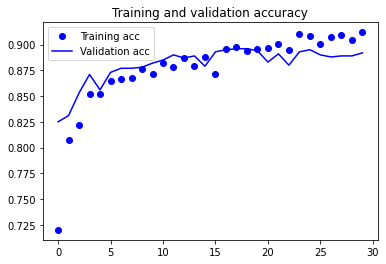

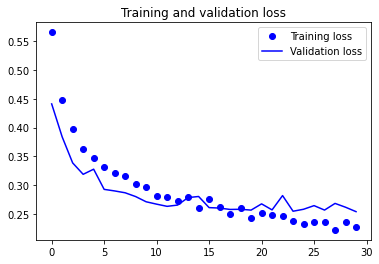

In [ ]:
#결과 그래프 그리기
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

[과제] 미세조정 상위 block 2개에 대하여

### 미세조정



특성 추출에 사용했던 동결 모델의 상위 층 몇 개를 동결에서 해제하고 모델에 새로 추가한 층과 함께 훈련하는 것 
- 주어진 문제에 조금 더 밀접하게 재사용 모델의 표현을 일부 조정하기 때문에 미세 조정이라고 부름


In [ ]:
#특정 층까지 모든 층 동결하기


conv_base.trainable = True
#동결
set_trainable = False

for layer in conv_base.layers:
  if layer.name =='block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable =True
  else:
    layer.trainable=False

# for layer in conv_base.layers:
#   if layer.name =='block4_conv1':
#     set_trainable = True
#   if set_trainable:
#     layer.trainable =True
#   else:
#     layer.trainable=False

In [ ]:
#모델 미세 조정하기
#학습률 낮춘 RMSprop 사용 학습된 표현을 조금씩 수정하기 위함 
model.compile(loss='binary_crossentropy',optimizer = optimizers.RMSprop(lr=1e-5),metrics=['acc'])
history = model.fit_generator(train_generator,steps_per_epoch=100, epochs=100,validation_data=validation_generator,validation_steps=50)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


100/100 [==============================] - 24s 225ms/step - loss: 0.2233 - acc: 0.9130 - val_loss: 0.2367 - val_acc: 0.9110
Epoch 2/100
100/100 [==============================] - 23s 227ms/step - loss: 0.1849 - acc: 0.9185 - val_loss: 0.2307 - val_acc: 0.9150
Epoch 3/100
100/100 [==============================] - 23s 226ms/step - loss: 0.1520 - acc: 0.9415 - val_loss: 0.2273 - val_acc: 0.9250
Epoch 4/100
100/100 [==============================] - 22s 225ms/step - loss: 0.1466 - acc: 0.9410 - val_loss: 0.2407 - val_acc: 0.9200
Epoch 5/100
100/100 [==============================] - 22s 223ms/step - loss: 0.1260 - acc: 0.9515 - val_loss: 0.2290 - val_acc: 0.9200
Epoch 6/100
100/100 [==============================] - 22s 224ms/step - loss: 0.1053 - acc: 0.9600 - val_loss: 0.2276 - val_acc: 0.9200
Epoch 7/100
100/100 [==============================] - 22s 224ms/step - loss: 0.0928 - acc: 0.9640 - val_loss: 0.2339 - val_acc: 0.9210
Epoch 8/100
100/100 [==============================] - 22s 2

In [ ]:
model.save('cats_and_dogs_small_4.h5')

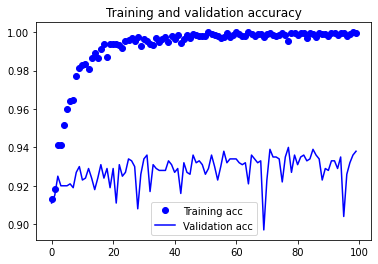

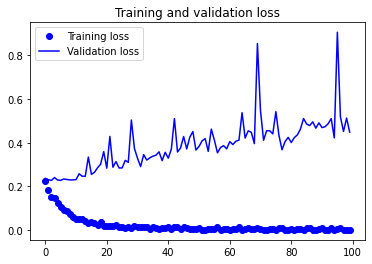

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

그래프가 불규칙하게 보여, 그래프를 보기 쉽게하기 위해 지수 이동 평균으로 정확도와 손실 값을 부드럽게 표현할 수 있습니다. 다음은 지수 이동 평균을 구하기 위한 간단한 함수입니다:

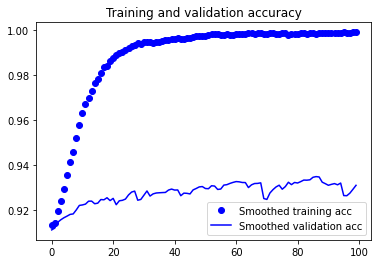

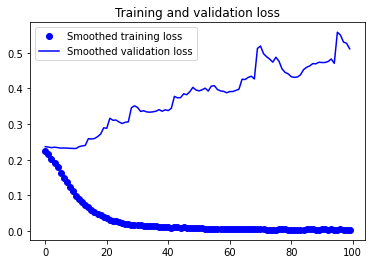

In [ ]:
from math import e
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

-> 손실 곡선은 실제로는 더 악화됨.손실이 감소되지 않았으나, 그래프는 개별 손실 값의 평균을 그린 것.
정확도에 영향을 미치는 것은 손실 값의 분포이지 평균이 아님. 정확도는 모델이 예측한 클래스의 확률이 어떤 임계 값을 넘었는지에 대한 결과이기 때문

In [ ]:
test_generator =test_datagen.flow_from_directory(test_dir,target_size=(150,150),batch_size=20,class_mode='binary')
test_loss ,test_acc = model.evaluate_generator(test_generator,steps=50)
print('test acc',test_acc)

Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


test acc 0.9380000233650208
